<b> Web and Socail Analytics project- Spotify and Youtube Analysis </b><br>
#Topic: Music Streaming Trends and their Influence on Song Popularity <br>
#Dataset: https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

<b><li> Process </b>
    1. Read file <br>
    2. Decriptive statistics (Statistics, rows, columns, missing values,..) <br>
    3. Data Cleaning, preprocessing <br>
    4. EDA(Visualization)<br>
    5. Metrics <br>
    6. Predictive Analysis 

In [1]:
#PACKAGES
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np

from wordcloud import WordCloud


from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectFromModel 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import seaborn as sns

import statsmodels.api as sm



import warnings
warnings.filterwarnings("ignore")

C:\Users\saksh\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<b> Data Description: </b>

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#Redaing csv
syt = pd.read_csv("Spotify_Youtube.csv",index_col=0) #index=0: to get rid of unnamed col in dataset
syt.head(2)

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [3]:
syt.columns

Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

<b> Preprocessing </b>

In [4]:
#deleting non-required columns:
syt.drop(['Url_spotify','Uri','Url_youtube','Channel','Description','Title'],axis=1,inplace=True)
syt.shape

(20718, 21)

In [5]:
b=syt.info()
print(b)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20718 entries, 0 to 20717
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Views             20248 non-null  float64
 16  Likes             20177 non-null  float6

In [6]:
numeric_var=syt.describe().T  #Numerical Variables
print(numeric_var)
#print(numeric_var.count)

                    count          mean           std           min  \
Danceability      20716.0  6.197775e-01  1.652724e-01      0.000000   
Energy            20716.0  6.352503e-01  2.141468e-01      0.000020   
Key               20716.0  5.300348e+00  3.576449e+00      0.000000   
Loudness          20716.0 -7.671680e+00  4.632749e+00    -46.251000   
Speechiness       20716.0  9.645601e-02  1.119600e-01      0.000000   
Acousticness      20716.0  2.915353e-01  2.862988e-01      0.000001   
Instrumentalness  20716.0  5.596156e-02  1.932620e-01      0.000000   
Liveness          20716.0  1.935210e-01  1.685309e-01      0.014500   
Valence           20716.0  5.298533e-01  2.454408e-01      0.000000   
Tempo             20716.0  1.206383e+02  2.957902e+01      0.000000   
Duration_ms       20716.0  2.247176e+05  1.247905e+05  30985.000000   
Views             20248.0  9.393782e+07  2.746443e+08      0.000000   
Likes             20177.0  6.633411e+05  1.789324e+06      0.000000   
Commen

In [7]:
string_var=syt.describe(include='O').T  #Object 
print(string_var)

                count unique                                        top   freq
Artist          20718   2079                                   Gorillaz     10
Track           20718  17841  El Ultimo Adiós - Varios Artistas Version     24
Album           20718  11937                              Greatest Hits     30
Album_type      20718      3                                      album  14926
Licensed        20248      2                                       True  14140
official_video  20248      2                                       True  15723


In [8]:
#Chceking null values 
syt.isna().any()
#as URL of youtube has missing values, by default, cols like title, views,likes, comments will have missing values. 

Artist              False
Track               False
Album               False
Album_type          False
Danceability         True
Energy               True
Key                  True
Loudness             True
Speechiness          True
Acousticness         True
Instrumentalness     True
Liveness             True
Valence              True
Tempo                True
Duration_ms          True
Views                True
Likes                True
Comments             True
Licensed             True
official_video       True
Stream               True
dtype: bool

In [9]:
syt.isnull().sum()/len(syt) * 100

Artist              0.000000
Track               0.000000
Album               0.000000
Album_type          0.000000
Danceability        0.009653
Energy              0.009653
Key                 0.009653
Loudness            0.009653
Speechiness         0.009653
Acousticness        0.009653
Instrumentalness    0.009653
Liveness            0.009653
Valence             0.009653
Tempo               0.009653
Duration_ms         0.009653
Views               2.268559
Likes               2.611256
Comments            2.746404
Licensed            2.268559
official_video      2.268559
Stream              2.780191
dtype: float64

In [18]:
#Handling Missinag values:
# List of columns from which you want to drop missing values
#columns_to_drop_missing = ['Danceability', 'Energy', 'Valence', 'Duration_ms', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Tempo','Views','Likes','Comments','Stream','official_video','Licensed']

# Drop missing values from specific columns
#syt.dropna(subset=columns_to_drop_missing, inplace=True)


In [10]:
#Handling Missinag values:
#Imputing missing values with mean (for numerical columns)
syt['Danceability'].fillna(syt['Danceability'].mean(), inplace=True)
syt['Energy'].fillna(syt['Energy'].mean(), inplace=True)
syt['Key'].fillna(syt['Key'].mean(), inplace=True)
syt['Loudness'].fillna(syt['Loudness'].mean(), inplace=True)
syt['Speechiness'].fillna(syt['Speechiness'].mean(), inplace=True)
syt['Acousticness'].fillna(syt['Acousticness'].mean(), inplace=True)
syt['Instrumentalness'].fillna(syt['Instrumentalness'].mean(), inplace=True)
syt['Liveness'].fillna(syt['Liveness'].mean(), inplace=True)
syt['Valence'].fillna(syt['Valence'].mean(), inplace=True)
syt['Tempo'].fillna(syt['Tempo'].mean(), inplace=True)
syt['Duration_ms'].fillna(syt['Duration_ms'].mean(), inplace=True)

# Imputing missing values with mode (for categorical columns)
#syt['Title'].fillna(syt['Title'].mode()[0], inplace=True)
syt['Licensed'].fillna(syt['Licensed'].mode()[0], inplace=True)
syt['official_video'].fillna(syt['official_video'].mode()[0], inplace=True)

#Popularity metrics:
#syt['Views'].fillna(0, inplace=True)
#syt['Likes'].fillna(0, inplace=True)
#syt['Stream'].fillna(0, inplace=True)

syt['Views'].fillna(syt['Views'].mean(), inplace=True)
syt['Likes'].fillna(syt['Likes'].mean(), inplace=True)
syt['Comments'].fillna(syt['Comments'].mean(), inplace=True)
syt['Stream'].fillna(syt['Stream'].mean(), inplace=True)


In [11]:
count_null = syt.isnull().sum(axis=0)  #counting null vcalues in each column
print(count_null)

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64


In [12]:
#Chceking duplicate rows
syt.duplicated().any()

False

In [13]:
#converting duration in milisecond to duration in minutes
syt['Duration_ms'] = syt['Duration_ms'] / 60000
syt.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,...,0.6130,0.772,138.559,3.710667,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,...,0.0463,0.852,92.761,3.336217,72011645.0,1079128.0,31003.0,True,True,3.100837e+08


In [14]:
#Chceking skewness values

# Extract the columns that you want to check for skewness
numeric_var = ['Danceability', 'Energy', 'Valence', 'Duration_ms', 'Key', 'Loudness', 
                      'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Tempo',
                      'Views', 'Likes', 'Comments', 'Stream']

# Calculate the skewness for each variable
skewness = syt[numeric_var].skew()

# Interpret the results
for var, skew_value in skewness.items():
    if skew_value > 0:
        print(f"{var} is positively skewed with skewness value: {skew_value:.2f}")
    elif skew_value < 0:
        print(f"{var} is negatively skewed with skewness value: {skew_value:.2f}")
    else:
        print(f"{var} is approximately symmetric (normally distributed) with skewness value: {skew_value:.2f}")

Danceability is negatively skewed with skewness value: -0.55
Energy is negatively skewed with skewness value: -0.71
Valence is negatively skewed with skewness value: -0.10
Duration_ms is positively skewed with skewness value: 23.38
Key is negatively skewed with skewness value: -0.00
Loudness is negatively skewed with skewness value: -2.70
Speechiness is positively skewed with skewness value: 3.37
Acousticness is positively skewed with skewness value: 0.88
Instrumentalness is positively skewed with skewness value: 3.72
Liveness is positively skewed with skewness value: 2.31
Tempo is positively skewed with skewness value: 0.39
Views is positively skewed with skewness value: 9.34
Likes is positively skewed with skewness value: 8.79
Comments is positively skewed with skewness value: 44.31
Stream is positively skewed with skewness value: 4.17


In [15]:
#After skewness removed by using Yeo-johnson method - updated values 
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import PowerTransformer

# Assuming 'syt' is your DataFrame containing the variables to be transformed
skewed_features = ['Danceability', 'Energy', 'Valence', 'Duration_ms', 'Key', 'Loudness',
                   'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Tempo', 'Views',
                   'Likes', 'Comments', 'Stream']

# Apply Yeo-Johnson transformation to the skewed features in the 'syt' DataFrame
pt = PowerTransformer(method='yeo-johnson')

for feature in skewed_features:
    # Reshape the data to a 2D array to fit the PowerTransformer
    data = syt[feature].values.reshape(-1, 1)
    
    # Apply the Yeo-Johnson transformation and overwrite the original values
    syt[feature] = pt.fit_transform(data)

# Print skewness after transformation
for feature in skewed_features:
    print(f"Skewness of {feature}: {syt[feature].skew()}")

Skewness of Danceability: -0.04863758766068698
Skewness of Energy: -0.10879503911324578
Skewness of Valence: -0.060698746796693216
Skewness of Duration_ms: -0.14105525068376695
Skewness of Key: -0.2423057038037393
Skewness of Loudness: 0.08459815656539252
Skewness of Speechiness: 0.658881392599697
Skewness of Acousticness: 0.20526129440138519
Skewness of Instrumentalness: 2.3648311625013156
Skewness of Liveness: 0.3563162037952559
Skewness of Tempo: 0.08775884577696755
Skewness of Views: -0.042376201097563175
Skewness of Likes: -0.028526026940597502
Skewness of Comments: -0.009773650906139505
Skewness of Stream: 0.01165306197113842


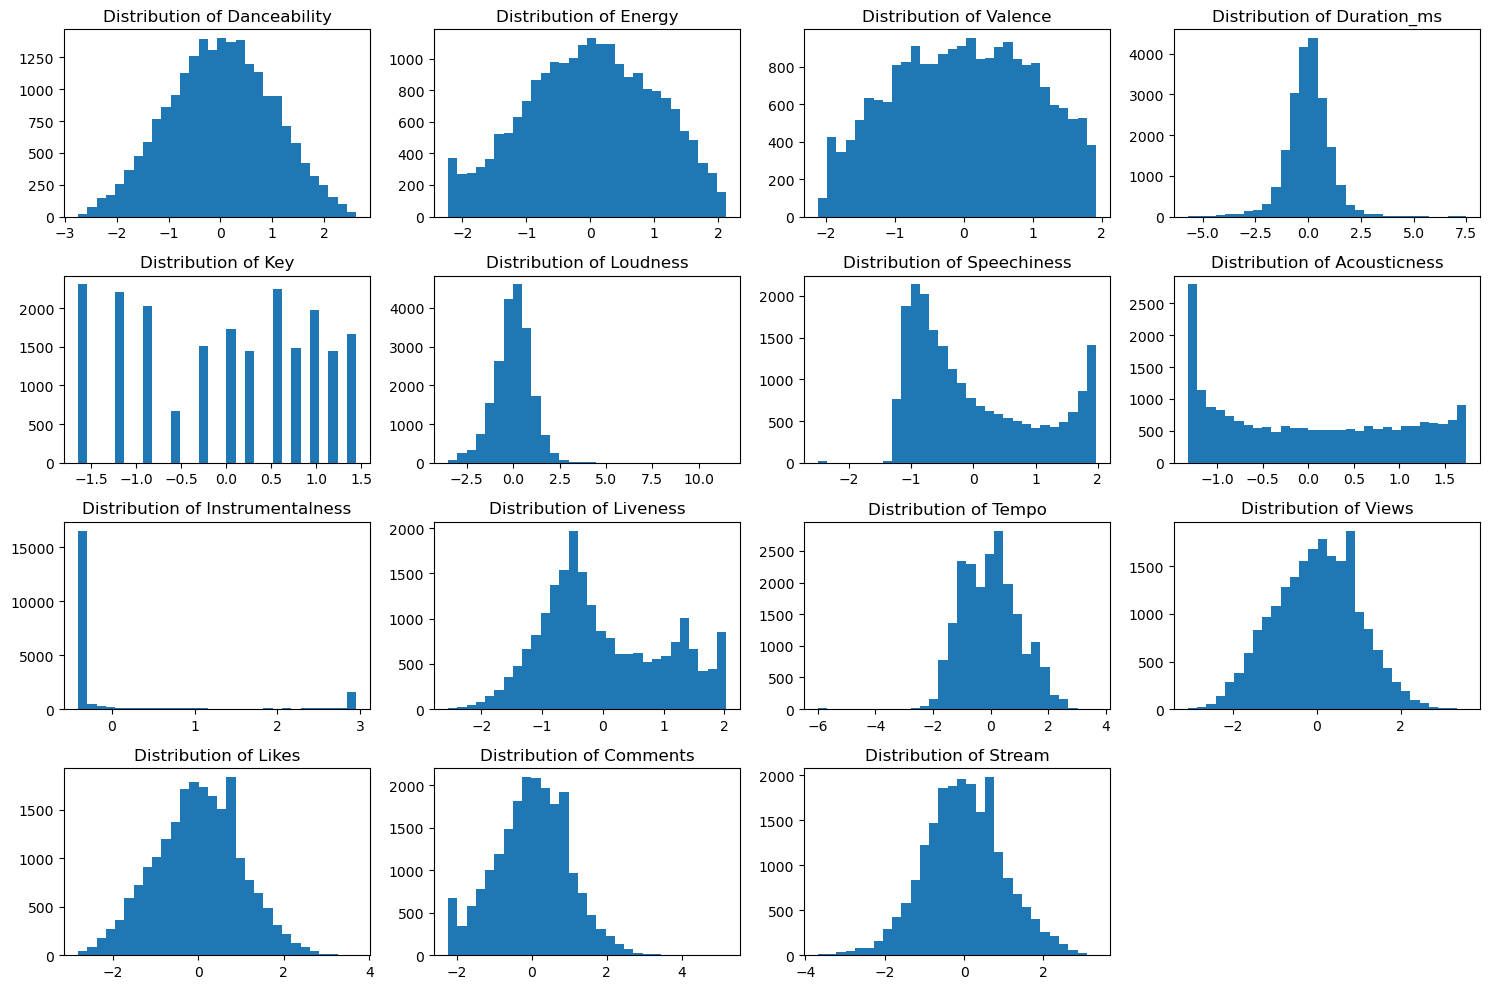

In [16]:
#Chceking Outliers graphically (Graph for Numerical Variables---)

variables = ['Danceability', 'Energy', 'Valence', 'Duration_ms', 'Key', 'Loudness', 'Speechiness',
             'Acousticness', 'Instrumentalness', 'Liveness', 'Tempo', 'Views', 'Likes', 'Comments', 'Stream']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(4, 4, i)
    plt.hist(syt[var], bins=30)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

#syt.head(2)

In [17]:
#Normalization using Robust Scaler

# Initialize the MinMaxScaler
#scaler = MinMaxScaler()

scaler = RobustScaler()
# Fit and transform the numerical features
syt[numeric_var] = scaler.fit_transform(syt[numeric_var])

syt.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.910986,0.139122,0.159174,-0.036892,1.138885,-0.619577,...,1.357625,0.614575,0.419236,0.126800,1.288497,1.493938,1.384495,True,True,1.758994
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.181252,0.131829,0.456701,0.200850,-0.432436,-0.316416,...,-0.921442,0.826758,-0.656971,-0.188268,0.456524,0.729596,0.711785,True,True,0.976196


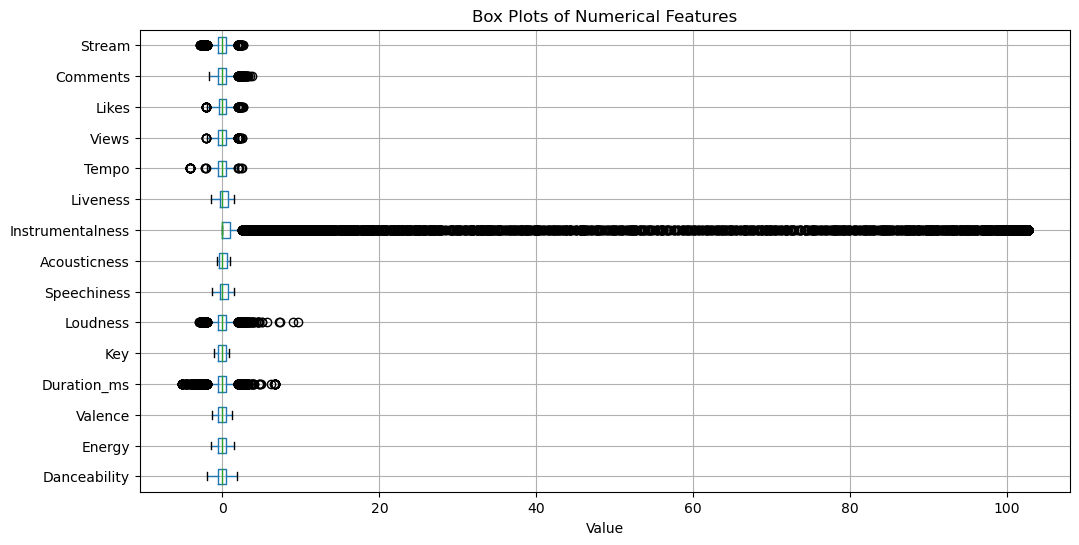

<Figure size 1200x800 with 0 Axes>

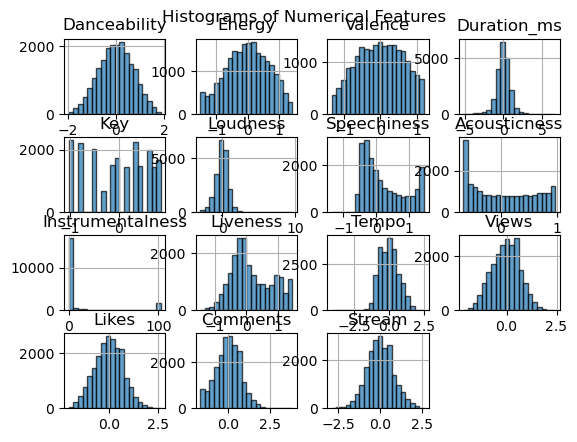

In [18]:
import matplotlib.pyplot as plt


# Box Plots
plt.figure(figsize=(12, 6))
syt[numeric_var].boxplot(vert=False)
plt.title("Box Plots of Numerical Features")
plt.xlabel("Value")
plt.show()

# Histograms
plt.figure(figsize=(12, 8))
syt[numeric_var].hist(bins=20, edgecolor='black', alpha=0.7)
plt.suptitle("Histograms of Numerical Features", y=0.94)
plt.show()

<b> EDA </b>

In [104]:
import matplotlib as plt
%matplotlib inline
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import seaborn as sns

<AxesSubplot:title={'center':'Distribution of Danceability'}, ylabel='Frequency'>

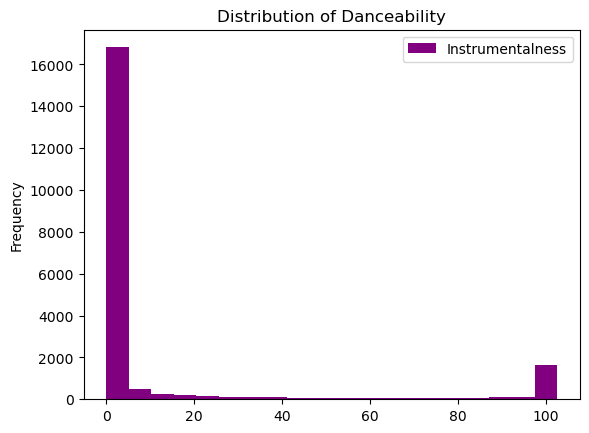

In [19]:
syt.plot(y="Instrumentalness", kind = 'hist', bins=20, color='purple', title='Distribution of Danceability')

<AxesSubplot:title={'center':'Distribution of Licensed'}, ylabel='Licensed'>

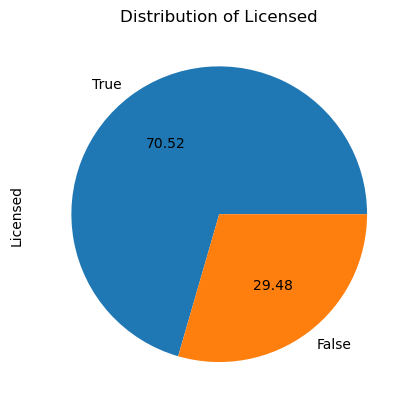

In [39]:
syt.Licensed.value_counts().plot(kind = 'pie', autopct='%.2f',title='Distribution of Licensed')

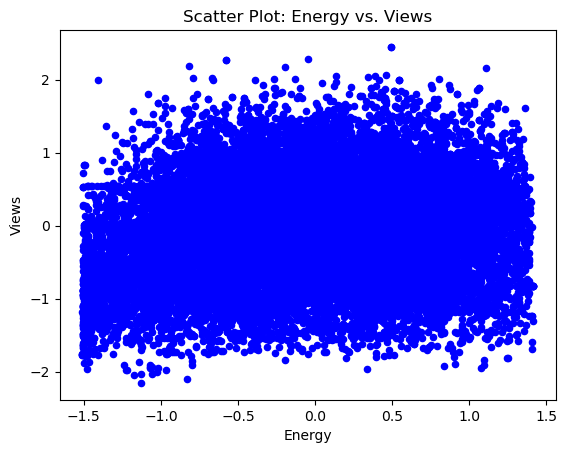

In [20]:
#Comparing two variables
syt.plot(x='Energy', y='Views', kind='scatter', color='blue', title='Scatter Plot: Energy vs. Views')
plt.xlabel('Energy')
plt.ylabel('Views')

plt.show()

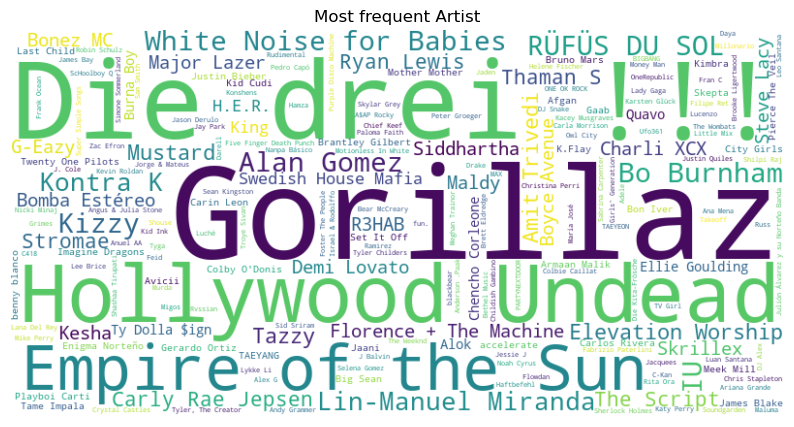

In [21]:
from wordcloud import WordCloud

# Assuming you have a DataFrame 'df' with the 'Artist' column

# Count the occurrences of each artist
top_artists = syt['Artist'].value_counts().head(20718)

# Convert the artist counts into a dictionary
artist_dict = top_artists.to_dict()

# Create a word cloud from the artist dictionary
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(artist_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Most frequent Artist')
plt.show()

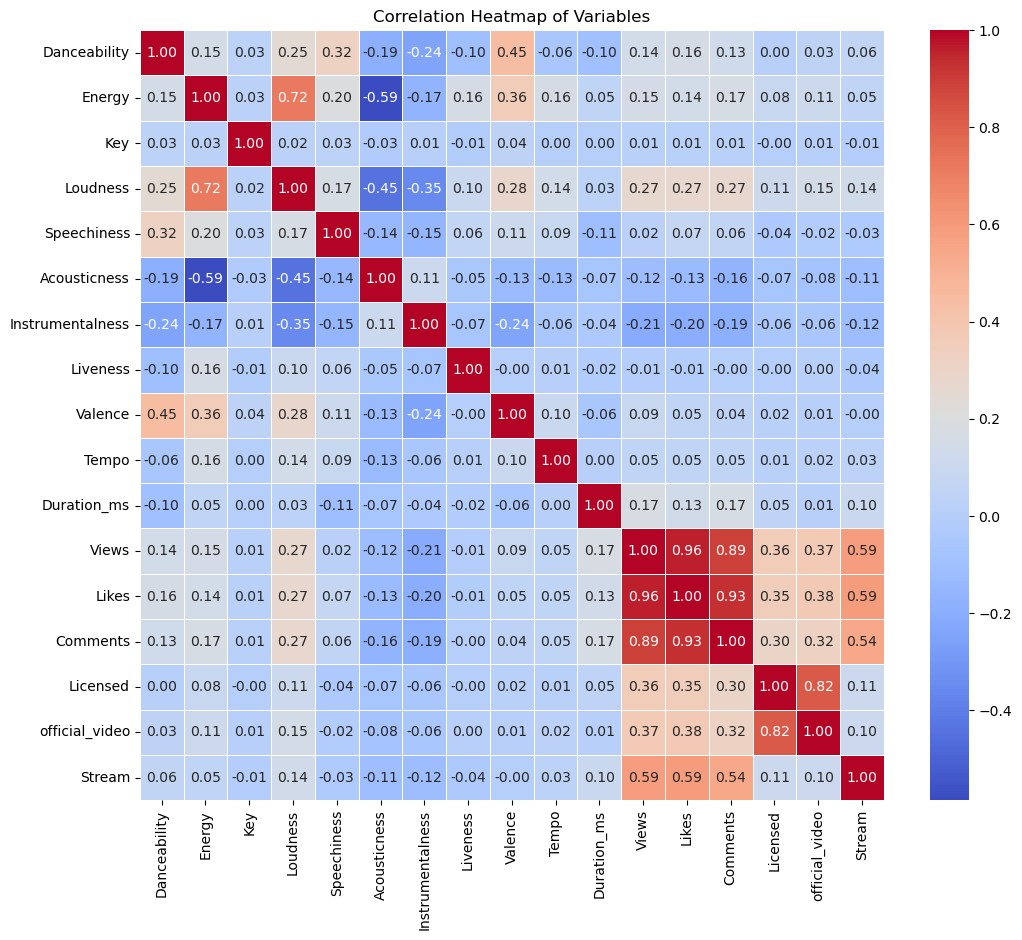

In [22]:
#Heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a correlation matrix for all variables
correlation_matrix = syt.corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Variables')
plt.show()

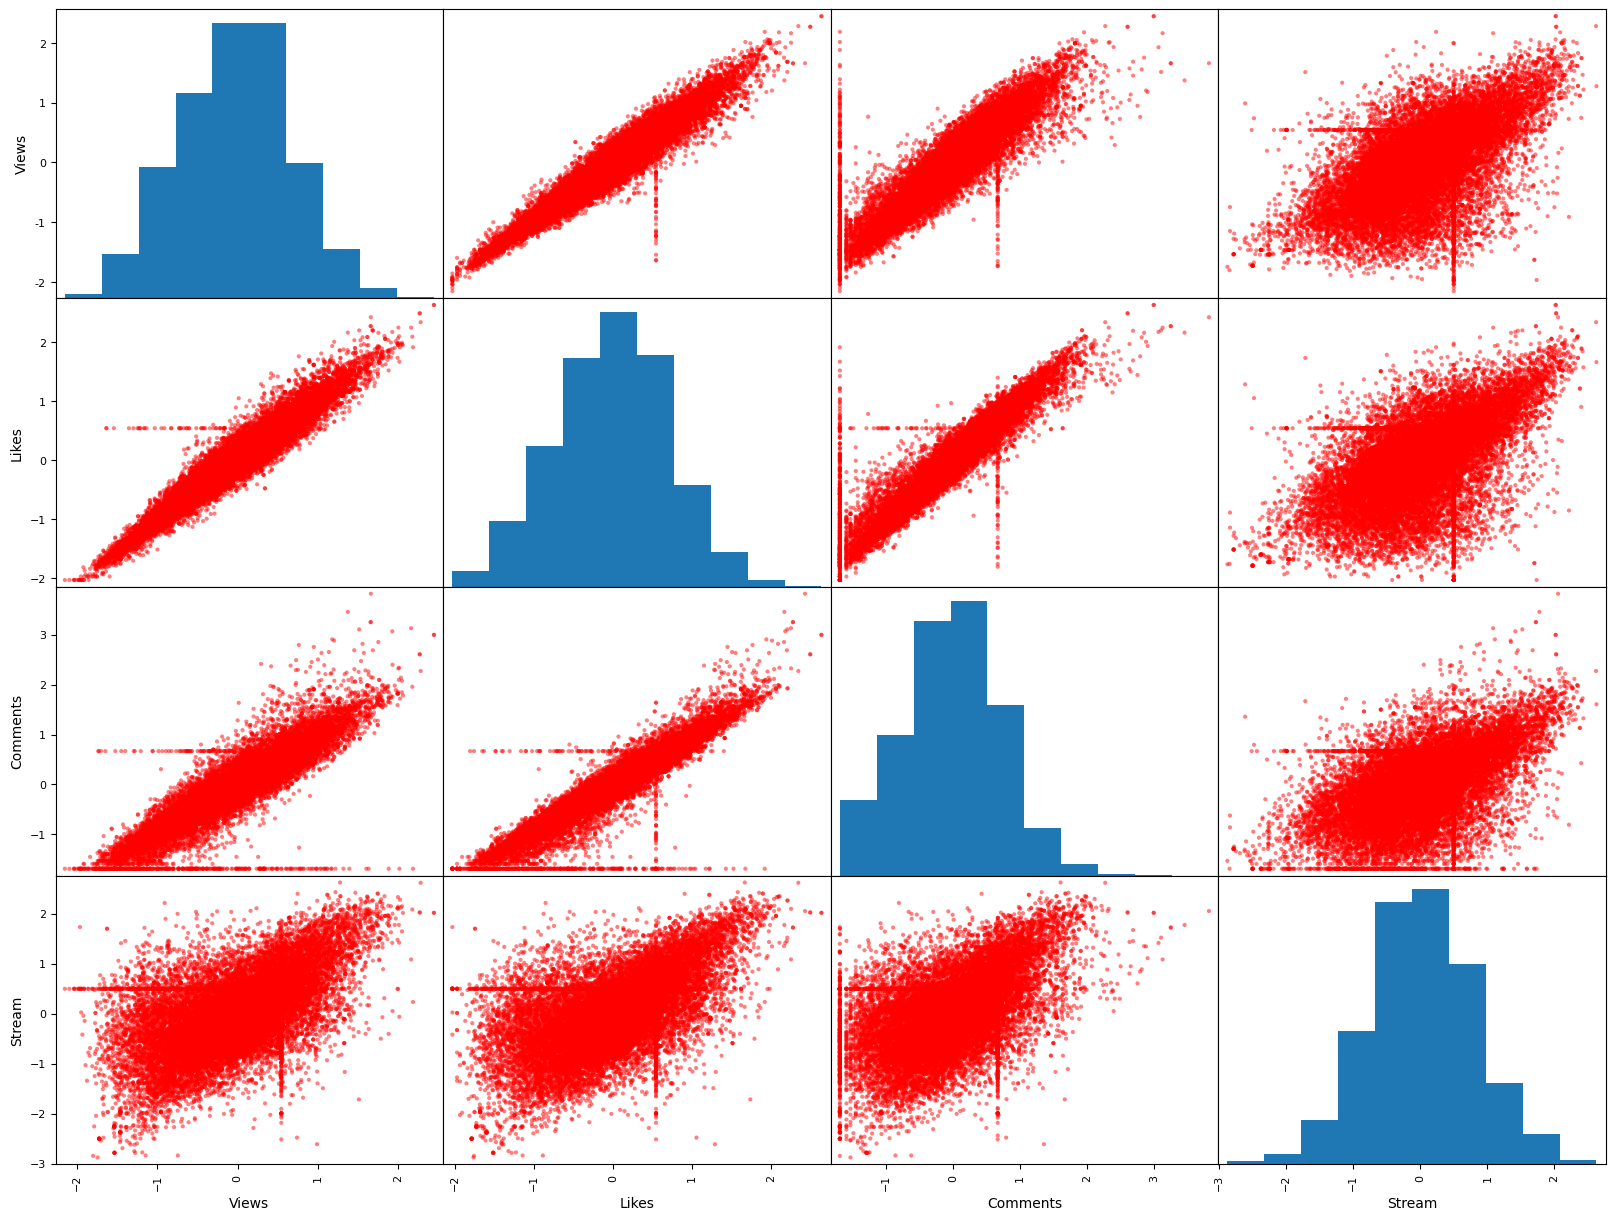

In [23]:
#Checking relation ship between variables: (mostly here, target variables)
from pandas.plotting import scatter_matrix
attributes = ['Views','Likes','Comments','Stream']
scatter_matrix(syt[attributes], figsize=(20,15), color='red')
plt.show()

In [24]:
#Converting categorical variables to dummy variables
syt['Licensed'] = syt['Licensed'].replace({True: 1, False: 0})
syt['official_video'] = syt['official_video'].replace({True: 1, False: 0})
#syt.head(5)

In [ ]:
# X = Musical_attributes
#X = syt[['Danceability','Energy', 'Valence', 'Duration_ms', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 
    #     'Instrumentalness', 'Liveness', 'Tempo']]


<b> EXPLORATORY MODELING USING OLS (Used to check liner relationship between indepemdent variables and dependent variable) </b>

In [25]:
#Exploratoty data analysis for target variable views,likes, comments using musical attributes
#Finding relationship between dependent and independent variable (R2) - explorartory.
#OLS:

import statsmodels.api as sm

X = syt[['Danceability','Energy', 'Valence', 'Duration_ms', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Tempo']]
y = syt[['Views']]   #similarly chceking for 'Likes' 'Comments' and 'Stream' using musical attributes
model = sm.OLS(y, X).fit()
model.summary()

#Non-significant variable here is "Key", "Accousticness", and "Liveness"

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Views   R-squared (uncentered):                   0.123
Model:                            OLS   Adj. R-squared (uncentered):              0.122
Method:                 Least Squares   F-statistic:                              263.7
Date:                Thu, 10 Aug 2023   Prob (F-statistic):                        0.00
Time:                        19:45:35   Log-Likelihood:                         -20510.
No. Observations:               20718   AIC:                                  4.104e+04
Df Residuals:                   20707   BIC:                                  4.113e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Danceability         0.0984      0.008     12.303      0.000       0.083       0.114
Energy              -0.0541      0.012     -4.629      0.000      -0.077      -0.031
Valence             -0.0223      0.009     -2.537      0.011      -0.040      -0.005
Duration_ms          0.1306      0.005     25.490      0.000       0.121       0.141
Key                  0.0068      0.007      0.915      0.360      -0.008       0.021
Loudness             0.2007      0.008     23.941      0.000       0.184       0.217
Speechiness         -0.0309      0.007     -4.174      0.000      -0.045      -0.016
Acousticness        -0.0020      0.011     -0.187      0.852      -0.023       0.019
Instrumentalness    -0.0023      0.000    -15.144      0.000      -0.003      -0.002
Liveness            -0.0084      0.007     -1.181      0.238      -0.022       0.006
Tempo                0.0290      0.007      4.257      0.000       0.016       0.042
==============================================================================
Omnibus:                       45.807   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.619
Skew:                          -0.081   Prob(JB):                     5.56e-10
Kurtosis:                       2.848   Cond. No.                         109.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
import statsmodels.api as sm

X = syt[['Danceability','Energy', 'Valence', 'Duration_ms', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 
         'Instrumentalness', 'Liveness', 'Tempo']]
y = syt[['Stream']]   #similarly chceking for 'Stream' variable using musical attributes
model = sm.OLS(y, X).fit()
model.summary()
#Non-sig here is "Key" variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Stream   R-squared (uncentered):                   0.046
Model:                            OLS   Adj. R-squared (uncentered):              0.045
Method:                 Least Squares   F-statistic:                              90.52
Date:                Thu, 10 Aug 2023   Prob (F-statistic):                   1.43e-201
Time:                        19:45:50   Log-Likelihood:                         -23922.
No. Observations:               20718   AIC:                                  4.787e+04
Df Residuals:                   20707   BIC:                                  4.795e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Danceability         0.0398      0.009      4.223      0.000       0.021       0.058
Energy              -0.1609      0.014    -11.672      0.000      -0.188      -0.134
Valence             -0.0446      0.010     -4.305      0.000      -0.065      -0.024
Duration_ms          0.0748      0.006     12.375      0.000       0.063       0.087
Key                 -0.0127      0.009     -1.452      0.146      -0.030       0.004
Loudness             0.1676      0.010     16.957      0.000       0.148       0.187
Speechiness         -0.0345      0.009     -3.949      0.000      -0.052      -0.017
Acousticness        -0.1463      0.013    -11.544      0.000      -0.171      -0.121
Instrumentalness    -0.0011      0.000     -6.076      0.000      -0.001      -0.001
Liveness            -0.0190      0.008     -2.276      0.023      -0.035      -0.003
Tempo                0.0189      0.008      2.353      0.019       0.003       0.035
==============================================================================
Omnibus:                       18.495   Durbin-Watson:                   0.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.914
Skew:                          -0.018   Prob(JB):                     2.88e-05
Kurtosis:                       3.151   Cond. No.                         109.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#OLS: checking for stream on youtube statistics only
import statsmodels.api as sm

X = syt[['Views','Likes','Comments','Licensed','official_video']]
y = syt['Stream']
model = sm.OLS(y, X).fit()
model.summary()

#Non-significant here: "Licensed" and "Official_video"

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Stream   R-squared (uncentered):                   0.356
Model:                            OLS   Adj. R-squared (uncentered):              0.356
Method:                 Least Squares   F-statistic:                              2292.
Date:                Thu, 10 Aug 2023   Prob (F-statistic):                        0.00
Time:                        19:45:54   Log-Likelihood:                         -19848.
No. Observations:               20718   AIC:                                  3.971e+04
Df Residuals:                   20713   BIC:                                  3.975e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Views              0.3003      0.023     12.860      0.000       0.255       0.346
Likes              0.4391      0.028     15.812      0.000       0.385       0.494
Comments          -0.0685      0.016     -4.221      0.000      -0.100      -0.037
Licensed          -0.0198      0.017     -1.175      0.240      -0.053       0.013
official_video    -0.0079      0.016     -0.492      0.622      -0.039       0.023
==============================================================================
Omnibus:                      117.493   Durbin-Watson:                   1.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.576
Skew:                           0.045   Prob(JB):                     4.09e-37
Kurtosis:                       3.431   Cond. No.                         10.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> Predictive Analysis: Model </b><br>
<b> A. Prediction of Views, Likes and Comments on Musical Attribute <br>
    B. Predication of Stream on Musical Attribute <br>
    C. Prediction of Stream on Youtube statistics only </b>

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

#s2
model = RandomForestRegressor(n_estimators=100, random_state=42)
#3
# Step 3
X = syt[['Danceability', 'Energy','Valence', 'Duration_ms', 'Loudness', 'Speechiness', 'Acousticness', 
         'Instrumentalness', 'Liveness', 'Tempo']]
y = syt[['Views','Likes','Comments']]


#X = syt[['Views','Likes','Comments','official_video','Licensed']]
#y = syt['Stream']

# Feature Scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#s4
model.fit(X_train, y_train)
#s5
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

#R2
train_r2 = r2_score(y_train, y_train_hat)
test_r2 = r2_score(y_test, y_test_hat)
print("R-squared of in-sample(train) data:", train_r2)
print("R-squared of out-sample(test) data:", test_r2)

#MSE
in_MSE = mean_squared_error(y_train,y_train_hat)
print("Mean Square Error for train data",in_MSE)
out_MSE = mean_squared_error(y_test,y_test_hat)
print("Mean Square Error for test data",out_MSE)


#from sklearn.metrics import mean_absolute_error, mean_squared_error
#MAE = mean_absolute_error(y_test,y_test_hat)
#MSE = mean_squared_error(y_test,y_test_hat)
#RMSE = np.sqrt(MSE)

#print("MAE = {}".format(MAE))
#print("MSE = {}".format(MSE))
#print("RMSE = {}".format(RMSE))

R-squared of in-sample(train) data: 0.8799488335548541
R-squared of out-sample(test) data: 0.2418478459309764
Mean Square Error for train data 0.06229496117891509
Mean Square Error for test data 0.3807032996984728


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection based on correlation with the target variable
X = syt[['Danceability', 'Energy','Valence', 'Duration_ms', 'Loudness', 'Speechiness', 'Acousticness', 
         'Instrumentalness', 'Liveness', 'Tempo']]
y = syt[['Views','Likes','Comments']]
# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_

# Fit the model with the best hyperparameters
model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
model.fit(X_train, y_train)

# Predict on training and test data
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_hat)
test_r2 = r2_score(y_test, y_test_hat)
print("R-squared of in-sample(train) data:", train_r2)
print("R-squared of out-sample(test) data:", test_r2)

in_MSE = mean_squared_error(y_train, y_train_hat)
print("Mean Square Error for train data:", in_MSE)
out_MSE = mean_squared_error(y_test, y_test_hat)
print("Mean Square Error for test data:", out_MSE)

# Cross-validation to assess model performance
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_MSE = -cv_scores.mean()
cv_r2 = cross_val_score(model, X_scaled, y, cv=5, scoring='r2').mean()

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

print("Cross-Validation MSE:", cv_MSE)
print("Cross-Validation R-squared:", cv_r2)

R-squared of in-sample(train) data: 0.6303765154317723
R-squared of out-sample(test) data: 0.22169002458929354
Mean Square Error for train data: 0.19169638962540766
Mean Square Error for test data: 0.3908298004649193
Best Hyperparameters:
{'max_depth': 15, 'n_estimators': 150}
Cross-Validation MSE: 0.43789436761067624
Cross-Validation R-squared: 0.10325599978166167


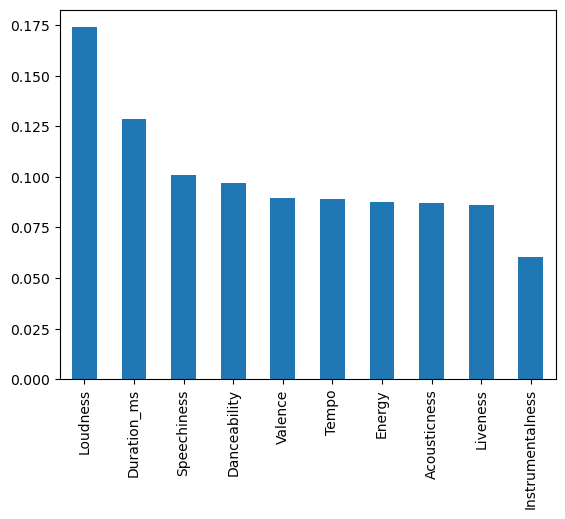

In [30]:
#Feature selection:--

X = syt[['Danceability', 'Energy','Valence', 'Duration_ms', 'Loudness', 'Speechiness', 'Acousticness',
         'Instrumentalness', 'Liveness', 'Tempo']]
y = syt[['Views','Likes','Comments']]


#X = syt[['Views','Likes','Comments','official_video','Licensed']]
#y = syt['Stream']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fs_rf=SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42)).fit(X_train,y_train)
rf=pd.Series(fs_rf.estimator_.feature_importances_,index=X_train.columns).sort_values(ascending=False)
rf.plot(kind='bar');


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection based on correlation with the target variable
X = syt[['Danceability', 'Energy','Valence', 'Duration_ms', 'Loudness', 'Speechiness', 'Acousticness',
         'Instrumentalness', 'Liveness', 'Tempo']]
y = syt['Stream']

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_

# Fit the model with the best hyperparameters
model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
model.fit(X_train, y_train)

# Predict on training and test data
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_hat)
test_r2 = r2_score(y_test, y_test_hat)
print("R-squared of in-sample(train) data:", train_r2)
print("R-squared of out-sample(test) data:", test_r2)

in_MSE = mean_squared_error(y_train, y_train_hat)
print("Mean Square Error for train data:", in_MSE)
out_MSE = mean_squared_error(y_test, y_test_hat)
print("Mean Square Error for test data:", out_MSE)

# Cross-validation to assess model performance
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_MSE = -cv_scores.mean()
cv_r2 = cross_val_score(model, X_scaled, y, cv=5, scoring='r2').mean()

print("Cross-Validation MSE:", cv_MSE)
print("Cross-Validation R-squared:", cv_r2)

R-squared of in-sample(train) data: 0.5622321516529144
R-squared of out-sample(test) data: 0.16474657383042157
Mean Square Error for train data: 0.27185993960593197
Mean Square Error for test data: 0.504430690514356
Cross-Validation MSE: 0.5800546752446443
Cross-Validation R-squared: -0.0228928674493206


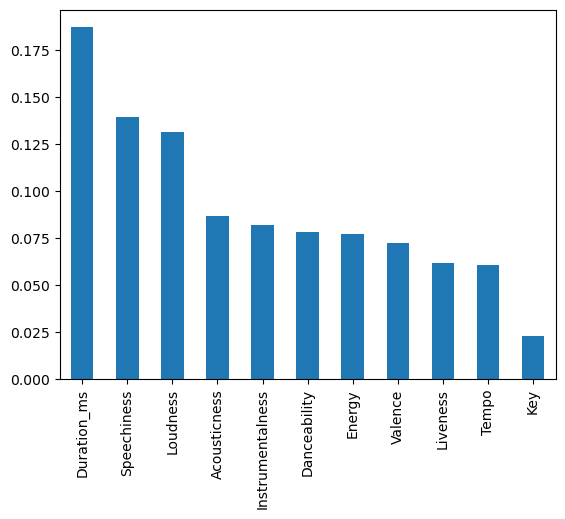

In [34]:
#Feature selection
X = syt[['Danceability', 'Energy', 'Valence', 'Duration_ms', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 
         'Instrumentalness', 'Liveness', 'Tempo']]
y = syt['Stream']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fs_rf=SelectFromModel(RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)).fit(X_train,y_train)
rf=pd.Series(fs_rf.estimator_.feature_importances_,index=X_train.columns).sort_values(ascending=False)
rf.plot(kind='bar');

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
# Feature selection based on correlation with the target variable
X = syt[['Danceability', 'Energy', 'Valence', 'Duration_ms', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
         'Instrumentalness', 'Liveness', 'Tempo','Views','Likes','Comments','official_video','Licensed']]
y = syt['Stream']

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on training and test data
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_hat)
test_r2 = r2_score(y_test, y_test_hat)
print("R-squared of in-sample(train) data:", train_r2)
print("R-squared of out-sample(test) data:", test_r2)

in_MSE = mean_squared_error(y_train, y_train_hat)
print("Mean Square Error for train data:", in_MSE)
out_MSE = mean_squared_error(y_test, y_test_hat)
print("Mean Square Error for test data:", out_MSE)

# Cross-validation to assess model performance
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_MSE = -cv_scores.mean()
cv_r2 = cross_val_score(model, X_scaled, y, cv=5, scoring='r2').mean()

print("Cross-Validation MSE:", cv_MSE)
print("Cross-Validation R-squared:", cv_r2)

R-squared of in-sample(train) data: 0.499845041975455
R-squared of out-sample(test) data: 0.47508216630067235
Mean Square Error for train data: 0.3106032048620308
Mean Square Error for test data: 0.31701116932921564
Cross-Validation MSE: 0.34994967352765216
Cross-Validation R-squared: 0.3749600050087302


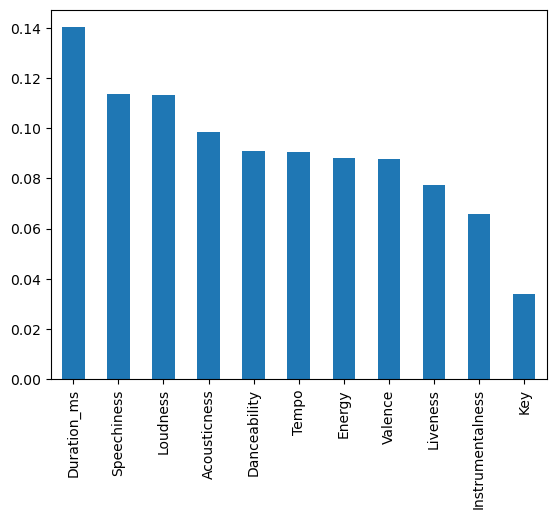

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor

X = syt[['Danceability', 'Energy', 'Valence', 'Duration_ms', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 
         'Instrumentalness', 'Liveness', 'Tempo']]
y = syt['Stream']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fs_rf=SelectFromModel(GradientBoostingRegressor(n_estimators=100, max_depth=10, random_state=42)).fit(X_train,y_train)
rf=pd.Series(fs_rf.estimator_.feature_importances_,index=X_train.columns).sort_values(ascending=False)
rf.plot(kind='bar');

In [148]:
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor  #
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import pandas as pd
#s2
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
#3
X = syt[['Danceability', 'Valence', 'Duration_ms', 'Loudness', 'Instrumentalness', 'Tempo']]
y = syt[['Views','Likes']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#s4
model.fit(X_train, y_train)
#s5
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

#R2
train_r2 = r2_score(y_train, y_train_hat)
test_r2 = r2_score(y_test, y_test_hat)
print("R-squared of in-sample(train) data:", train_r2)
print("R-squared of out-sample(test) data:", test_r2)

#MSE
in_MSE = mean_squared_error(y_train,y_train_hat)
print("Mean Square Error for train data",in_MSE)
out_MSE = mean_squared_error(y_test,y_test_hat)
print("Mean Square Error for test data",out_MSE)

# Get feature importance scores
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Display feature importance scores
print(feature_importance)

R-squared of in-sample(train) data: 0.33286835973518664
R-squared of out-sample(test) data: 0.16448930748834079
Mean Square Error for train data 0.3341670442393537
Mean Square Error for test data 0.40810762867558226
Loudness            0.360723
Duration_ms         0.197553
Danceability        0.128217
Instrumentalness    0.106911
Valence             0.104556
Tempo               0.102041
dtype: float64


<b> CLUSTERING </b>

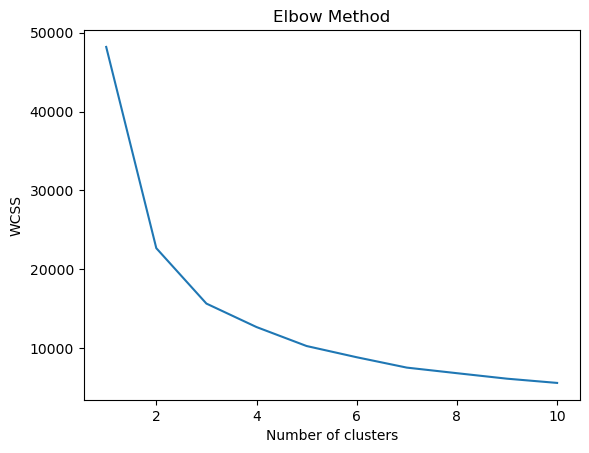

For n_clusters = 2 The average silhouette_score is : 0.44064299090979164
For n_clusters = 3 The average silhouette_score is : 0.37275793082300246
For n_clusters = 4 The average silhouette_score is : 0.3318848346072281
For n_clusters = 5 The average silhouette_score is : 0.34511173049894306
For n_clusters = 6 The average silhouette_score is : 0.3267489031714565
For n_clusters = 7 The average silhouette_score is : 0.3354562390113734
For n_clusters = 8 The average silhouette_score is : 0.32570177984008564
For n_clusters = 9 The average silhouette_score is : 0.3237515544698638


In [56]:
#Clustering using PCA and KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting only the numeric columns
X = syt[['Danceability','Energy', 'Valence', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 
         'Instrumentalness', 'Liveness', 'Tempo','Duration_ms']]


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(syt[['Stream','Views','Likes']])

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

# Determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(principalComponents)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#chosing best number of cluster:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

sil_scores = []
n_clusters = range(2,10)

for k in n_clusters:
    # Create the model with different number of clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0).fit(principalComponents)  
    y_kmeans = kmeans_model.predict(principalComponents)
    
    silhouette_avg = silhouette_score(principalComponents, y_kmeans)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)  #cluster 2 has more value 

In [67]:
#selected cluster number = 3. 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
syt['popularity_cluster'] = kmeans.fit_predict(principalComponents)  #new column added
#syt.head(2)

In [69]:
#Check the clusters distribution by Spotify stream mean
syt['Stream'].groupby(syt['popularity_cluster']).mean()/ 1e6 # in millions

popularity_cluster
0   -7.719973e-07
1    1.113232e-06
2   -7.522310e-08
Name: Stream, dtype: float64

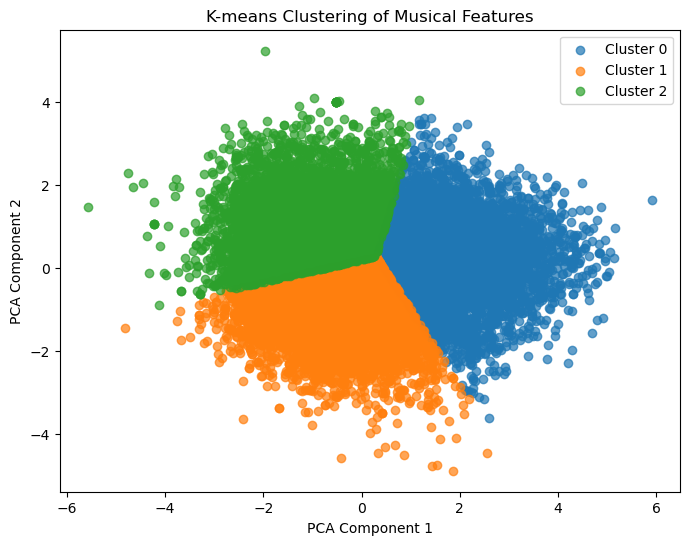

1    6226
2    5241
0    4819
Name: Cluster, dtype: int64


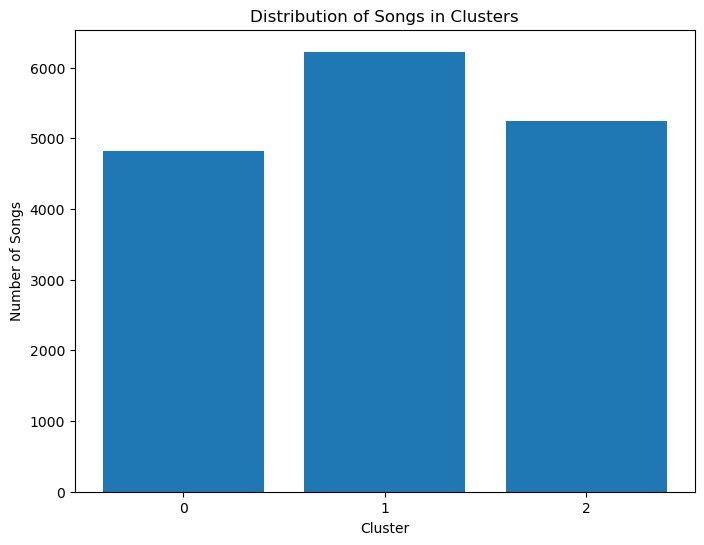

In [104]:
X = syt[['Danceability', 'Energy', 'Valence', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 
         'Instrumentalness', 'Liveness', 'Tempo', 'Duration_ms']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-means clustering
num_clusters = 3  # You can adjust the number of clusters based on your requirements
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_pca)

# Add the cluster labels to the DataFrame
syt['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    plt.scatter(
        X_pca[syt['Cluster'] == cluster, 0],
        X_pca[syt['Cluster'] == cluster, 1],
        label=f'Cluster {cluster}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Musical Features')
plt.legend()
plt.show()

# Count the number of songs in each cluster
cluster_counts = syt['Cluster'].value_counts()
print(cluster_counts)
# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs in Clusters')
plt.xticks(cluster_counts.index)
plt.show()

In [102]:
# Create a dictionary with  the cluster names for the legend
name_mapper = {1: 'High-popularity', 2: 'Medium-popularity', 0:'Low-popularity'}
# Use the map to create a new column with the new group names
syt['popularity_group'] = syt['popularity_cluster'].map(name_mapper)
syt.tail(7)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Title,Views,Likes,Comments,Licensed,official_video,Stream,popularity_cluster,Cluster,popularity_group
20709,SICK LEGEND,SUMMER TIME SADNESS HARDSTYLE,SUMMER TIME SADNESS HARDSTYLE,single,-1.017678,0.954443,-1.192806,-0.007802,1.189185,-0.664079,...,SUMMER TIME SADNESS HARDSTYLE,-1.904549,-1.936117,-2.335907,1,1,-0.987561,0,2,Low-popularity
20710,SICK LEGEND,PART OF ME HARDSTYLE,PART OF ME HARDSTYLE,single,-0.843449,1.513554,0.473687,1.313936,-0.586695,-1.339677,...,PART OF ME HARDSTYLE,-1.294910,-1.297992,-2.335907,1,1,-0.763466,0,2,Low-popularity
20711,SICK LEGEND,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,single,-2.057964,0.113454,-0.894881,-0.316355,-0.813086,-1.463408,...,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,-1.390139,-1.380630,-2.335907,1,1,-0.736911,0,2,Low-popularity
20712,SICK LEGEND,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),EVERYTIME WE TOUCH HARDSTYLE (SPED UP),single,-0.625710,1.307351,-1.192806,0.445252,-0.324910,0.197560,...,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),-1.977431,-2.000119,-2.335907,1,1,-1.034559,0,1,Low-popularity
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,-0.445692,1.695289,-0.071415,-0.014499,-1.098683,0.916706,...,JUST DANCE HARDSTYLE,-1.681710,-1.678796,-2.335907,1,1,-1.072848,0,1,Low-popularity
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,-0.769712,1.772387,-0.341747,2.629146,1.081916,-1.181976,...,SET FIRE TO THE RAIN HARDSTYLE,-1.494817,-1.527756,-2.335907,1,1,-0.984613,0,2,Low-popularity
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,-1.288108,0.995769,-0.341747,0.681700,0.192145,-1.217570,...,OUTSIDE HARDSTYLE SPED UP,-1.825649,-1.956467,-2.335907,1,1,-1.275222,0,2,Low-popularity


In [99]:
#Set color palettes for plots

# Paleta de colores verde para Spotify
spotify_palette = sns.light_palette("green", n_colors=10, reverse=True)

# Paleta de colores rojo para YouTube
youtube_palette = sns.light_palette("red", n_colors=10, reverse=True)

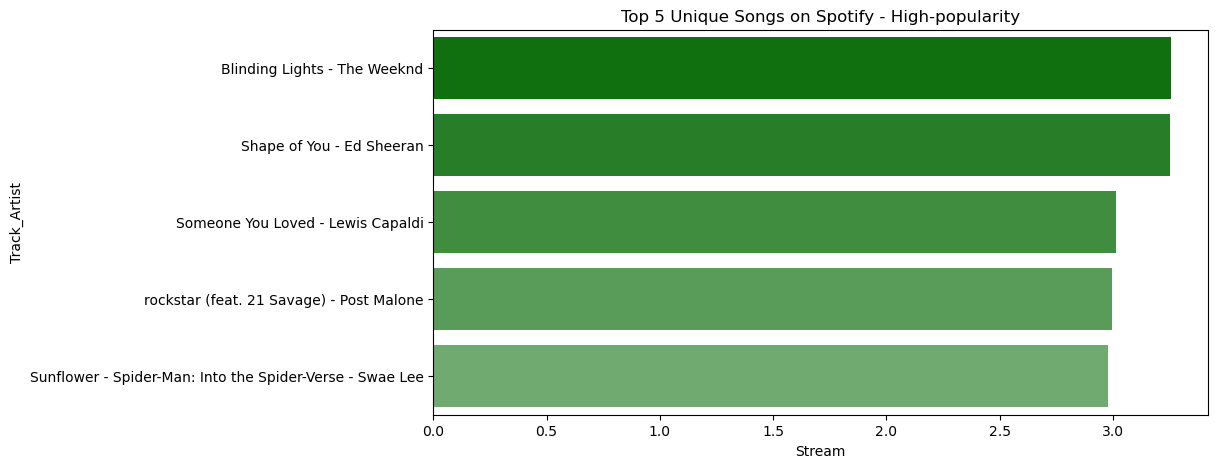

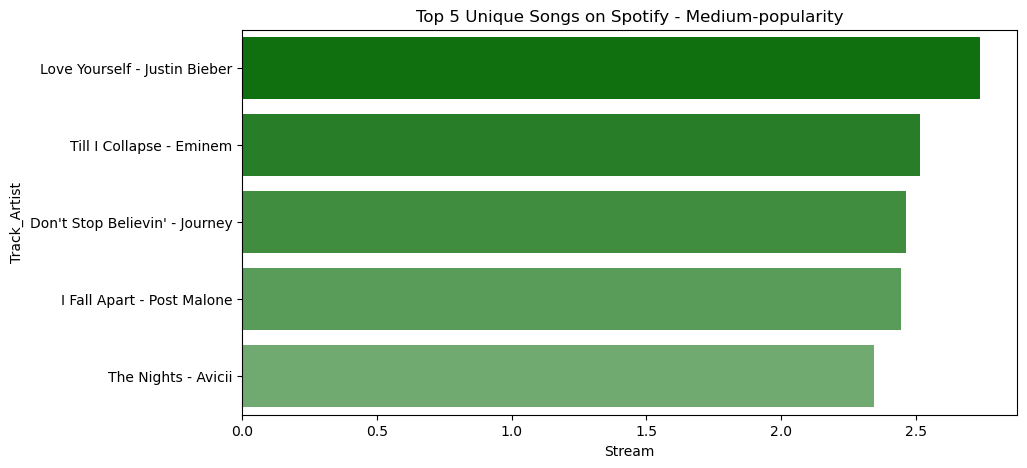

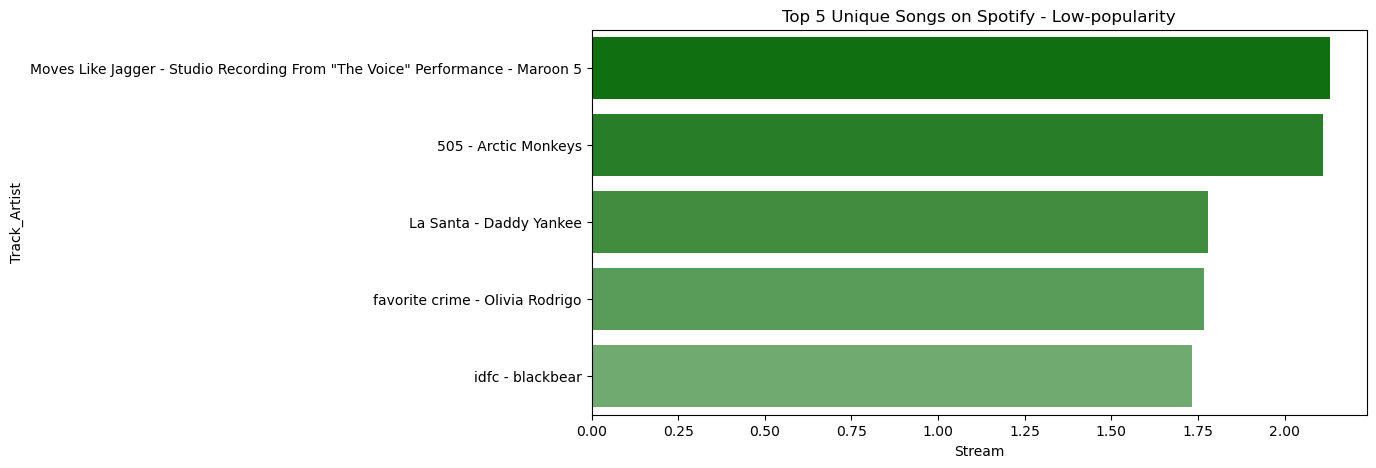

In [101]:
# Plot Top 5 Unique Songs on Spotify by Popularity Group
for group in syt['popularity_group'].unique():
    data = syt[syt['popularity_group'] == group].copy()
    data['Track_Artist'] = data['Track'] + ' - ' + data['Artist']
    data = data.groupby('Track_Artist').Stream.max().sort_values(ascending=False).head(5).reset_index()
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x='Stream', y='Track_Artist', data=data, palette=spotify_palette)
    plt.title(f'Top 5 Unique Songs on Spotify - {group}')
    plt.show()